<a href="https://colab.research.google.com/github/dilipvijjapu/MNIST_hand_digit_recognition/blob/master/MNIST_hand_digit_regonition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
import tensorflow as tf

(train_x,train_y),(test_x,test_y)=mnist.load_data()

In [121]:
train_x.shape

(60000, 28, 28)

In [122]:
img_rows=train_x[0].shape[0]
img_colums=train_x[0].shape[0]

#we have to reshape because we when giving input to convolution neural network it should be as 1 channel input so we are rehsaping according to it
train_x=train_x.reshape(train_x.shape[0],img_rows,img_colums,1)
test_x=test_x.reshape(test_x.shape[0],img_rows,img_colums,1)
train_x=train_x.astype('float32')
test_x=test_x.astype('float32')
#normalize the data set after reshaping
train_x=train_x/255
test_x=test_x/255
print(train_x.shape)
input_shape=(img_rows,img_colums,1)

(60000, 28, 28, 1)


In [123]:
train_x.shape

(60000, 28, 28, 1)

In [0]:

#now perform one hot encoding for the output trained data
from keras.utils import np_utils
y_train=np_utils.to_categorical(train_y)
y_test=np_utils.to_categorical(test_y)
num_cases=y_train.shape[1]


In [125]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
import keras

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_cases,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()
hist=model.fit(train_x,y_train,batch_size=1,epochs=2,verbose=1,validation_data=(test_x,y_test))


Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_55 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_56 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_56 (Dropout)         (None, 128)             

In [126]:
score=model.evaluate(test_x,y_test)
print(score)

313/313 [==============================] - 6s 21ms/step - loss: 0.0593 - accuracy: 0.9819
[0.05929236486554146, 0.9818999767303467]


{'loss': [0.19421876966953278, 0.1248350441455841], 'accuracy': [0.9437666535377502, 0.9668999910354614], 'val_loss': [0.06876523792743683, 0.05929156392812729], 'val_accuracy': [0.9799000024795532, 0.9818999767303467]}
[0.06876523792743683, 0.05929156392812729]


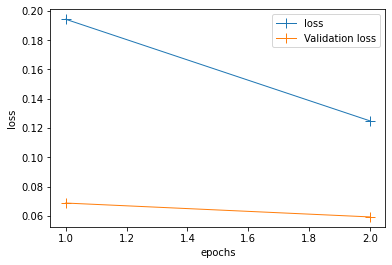

In [127]:
#plotting loss summary
import matplotlib.pyplot as plt
print(hist.history)
hist_dict=hist.history
loos_p=hist_dict['loss']
val_lossp=hist_dict['val_loss']
print(val_lossp)
epochs=range(1,len(loos_p)+1)
line1=plt.plot(epochs,loos_p,label="loss")
line2=plt.plot(epochs,val_lossp,label="Validation loss")
plt.setp(line1,linewidth=1.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=1.0,marker='+',markersize=10.0)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [0]:
model.save("my_model.h5")


In [132]:
from tensorflow.keras.models import load_model
load_model('my_model.h5')

In [134]:
from tensorflow.keras.utils import plot_model
plot_model('my_model.h5',to_file='model.png',show_shapes=True,show_layer_names=True)

AttributeError: ignored

# New Section